# 사전 작업

In [ ]:
# 구글 서버와 내 드라이브 연결 및 작업 디렉토리 변경
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'


# 이것저것 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 상권변화지표 분석

In [ ]:
# 상권 변화 정도를 지표로 나타낸 데이터가 있었다. 활용해서 시각화 해보자.
# 데이터 : 서울시 상권분석서비스(상권-상권변화지표)17~22년.csv

# 불러오기
df = pd.read_csv('서울시 상권분석서비스(상권-상권변화지표)17~22년.csv', encoding='cp949')
df

,연도,분기,상권구분코드,상권구분명,상권코드,상권명,자치구,행정동,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,HH,정체,146,65,123,56
1,2022,4,U,관광특구,1001495,잠실 관광특구,송파구,오륜동,LL,다이나믹,118,55,123,56
2,2022,4,U,관광특구,1001494,종로?청계 관광특구,종로구,종로1.2.3.4가동,HH,정체,165,75,123,56
3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,중구,광희동,HH,정체,151,65,123,56
4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,중구,소공동,HH,정체,170,66,123,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40015,2017,1,A,골목상권,2110005,세검정,종로구,부암동,HH,정체,105,56,98,51
40016,2017,1,A,골목상권,2110004,대신고등학교,종로구,무악동,HH,정체,149,66,98,51
40017,2017,1,A,골목상권,2110003,세검정초등학교,종로구,부암동,HH,정체,104,55,98,51
40018,2017,1,A,골목상권,2110002,독립문역 1번,종로구,무악동,HH,정체,116,55,98,51


In [ ]:
# 결측치 있나요? => 없었다!
# df.isna().sum()

In [ ]:
# 20년~ 22년 데이터만 남기자
# isin([list])
df = df[df['연도'].isin([2022,2021,2020])]
df

,연도,분기,상권구분코드,상권구분명,상권코드,상권명,자치구,행정동,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,HH,정체,146,65,123,56
1,2022,4,U,관광특구,1001495,잠실 관광특구,송파구,오륜동,LL,다이나믹,118,55,123,56
2,2022,4,U,관광특구,1001494,종로?청계 관광특구,종로구,종로1.2.3.4가동,HH,정체,165,75,123,56
3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,중구,광희동,HH,정체,151,65,123,56
4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,중구,소공동,HH,정체,170,66,123,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20011,2020,1,A,골목상권,2110005,세검정,종로구,부암동,HH,정체,114,58,110,54
20012,2020,1,A,골목상권,2110004,대신고등학교,종로구,무악동,HH,정체,151,76,110,54
20013,2020,1,A,골목상권,2110003,세검정초등학교,종로구,부암동,LH,상권확장,107,58,110,54
20014,2020,1,A,골목상권,2110002,독립문역 1번,종로구,무악동,HH,정체,137,60,110,54


In [ ]:
# 상권 변화 지표에는 무엇이 있는지 알아보기
print(df.상권변화지표.unique())
print(df.상권변화지표명.unique())


# 각 지표는 무엇을 의미하는가??

# L : LOW  //  H : HIGH
# - LL(다이나믹) : 해당 자치구 점포들의 영업기간이 서울시 평균 생존영업기간보다 낮고, 서울시 평균 폐업영업기간보다 낮은 상권  =>  신생 점포가 많고 폐업 점포도 많다
# - LH(상권확장) : 해당 자치구 점포들의 영업기간이 서울시 평균 생존영업기간보다 낮고, 서울시 평균 폐업영업기간보다 높은 상권  =>  신생 점포가 많고 폐업 점포는 적다
# - HL(상권축소) : 해당 자치구 점포들의 영업기간이 서울시 평균 생존영업기간보다 높고, 서울시 평균 폐업영업기간보다 낮은 상권  =>  신생 점포가 적고 폐업 점포는 많다
# - HH(정체) : 해당 자치구 점포들의 영업기간이 서울시 평균 생존영업기간보다 높고, 서울시 평균 폐업영업기간보다 높은 상권  =>  신생 점포와 폐업 점포 둘 다 적다  => 창업도 폐업도 많지 않음

# https://data.seoul.go.kr/dataList/OA-15567/S/1/datasetView.do 링크의 댓글 참고.

# '다이나믹' 지표는 쓸모없을 것 같고, 상권확장, 정체, 상권축소 이 3가지 지표만 활용하기로 한다.
# 각 지표에 각각 점수를 매겨보자. 다른 게 아니고 상권 변화 추이를 그래프로 시각화하기 위함이다.

['HH' 'LL' 'LH' 'HL']
['정체' '다이나믹' '상권확장' '상권축소']


In [ ]:
# 우선, 쓰지 않을 LL지수 행은 날리자.
df = df[df.상권변화지표 != 'LL'].reset_index()
df

,index,연도,분기,상권구분코드,상권구분명,상권코드,상권명,자치구,행정동,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균
0,0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,HH,정체,146,65,123,56
1,2,2022,4,U,관광특구,1001494,종로?청계 관광특구,종로구,종로1.2.3.4가동,HH,정체,165,75,123,56
2,3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,중구,광희동,HH,정체,151,65,123,56
3,4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,중구,소공동,HH,정체,170,66,123,56
4,5,2022,4,U,관광특구,1001491,이태원 관광특구,용산구,이태원1동,HH,정체,129,61,123,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12866,20011,2020,1,A,골목상권,2110005,세검정,종로구,부암동,HH,정체,114,58,110,54
12867,20012,2020,1,A,골목상권,2110004,대신고등학교,종로구,무악동,HH,정체,151,76,110,54
12868,20013,2020,1,A,골목상권,2110003,세검정초등학교,종로구,부암동,LH,상권확장,107,58,110,54
12869,20014,2020,1,A,골목상권,2110002,독립문역 1번,종로구,무악동,HH,정체,137,60,110,54


In [ ]:
# 점수 매기는 방법
# replace(dict) 활용.

# 예시
dfdf = pd.DataFrame({'target': ['a', 'c', 'b', 'd', 'b', 'a', 'c', 'd','a']})
print(dfdf)
print('='*100)
dfdf['score'] = dfdf['target'].replace({'a': 1, 'b': 2, 'c': 3, 'd': 4})
print(dfdf)

  target
0      a
1      c
2      b
3      d
4      b
5      a
6      c
7      d
8      a
  target  score
0      a      1
1      c      3
2      b      2
3      d      4
4      b      2
5      a      1
6      c      3
7      d      4
8      a      1


In [ ]:
# 점수 이름은 임의로 상권확장점수라 붙였음.
df['상권확장점수'] = df['상권변화지표'].replace({'LH':2, 'HH':1, 'HL':-1})
df

,index,연도,분기,상권구분코드,상권구분명,상권코드,상권명,자치구,행정동,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,상권확장점수
0,0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,HH,정체,146,65,123,56,1
1,2,2022,4,U,관광특구,1001494,종로?청계 관광특구,종로구,종로1.2.3.4가동,HH,정체,165,75,123,56,1
2,3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,중구,광희동,HH,정체,151,65,123,56,1
3,4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,중구,소공동,HH,정체,170,66,123,56,1
4,5,2022,4,U,관광특구,1001491,이태원 관광특구,용산구,이태원1동,HH,정체,129,61,123,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12866,20011,2020,1,A,골목상권,2110005,세검정,종로구,부암동,HH,정체,114,58,110,54,1
12867,20012,2020,1,A,골목상권,2110004,대신고등학교,종로구,무악동,HH,정체,151,76,110,54,1
12868,20013,2020,1,A,골목상권,2110003,세검정초등학교,종로구,부암동,LH,상권확장,107,58,110,54,2
12869,20014,2020,1,A,골목상권,2110002,독립문역 1번,종로구,무악동,HH,정체,137,60,110,54,1


## 1 : 구 별로 분석

In [ ]:
# 우선 구 별로.
df_gu = df.groupby(['연도', '분기', '자치구'])['상권확장점수'].sum().reset_index()

col = ['연도', '분기']
df_gu['연도-분기'] = df_gu[col].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
df_gu.drop(['연도', '분기'], axis=1, inplace=True)
df_gu = df_gu[['연도-분기', '자치구', '상권확장점수']]

df_gu

,연도-분기,자치구,상권확장점수
0,2020-1,강남구,25
1,2020-1,강동구,0
2,2020-1,강북구,15
3,2020-1,강서구,11
4,2020-1,관악구,30
...,...,...,...
295,2022-4,용산구,60
296,2022-4,은평구,47
297,2022-4,종로구,74
298,2022-4,중구,77


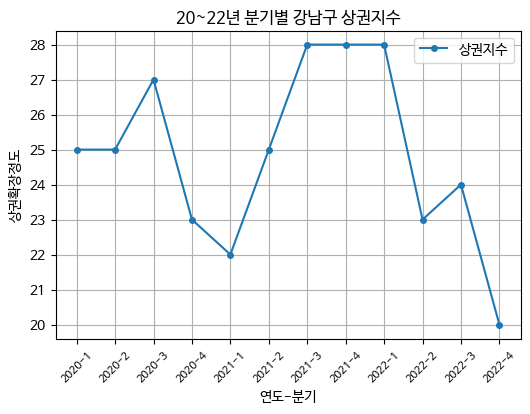

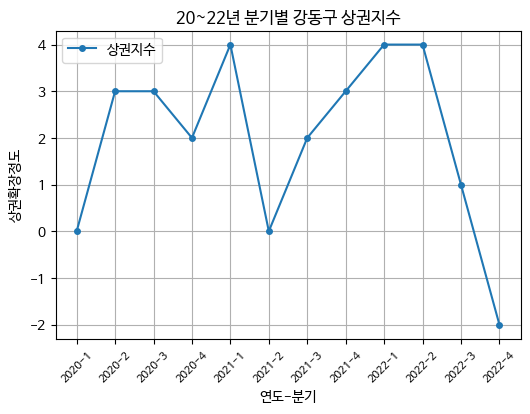

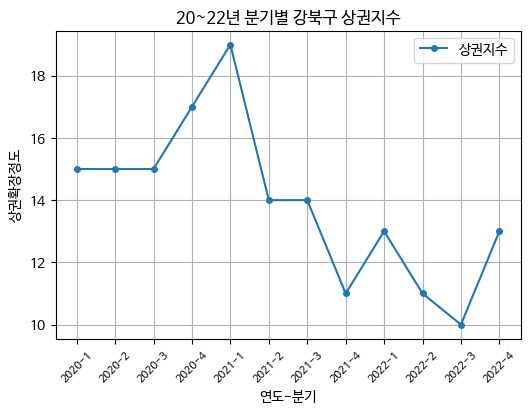

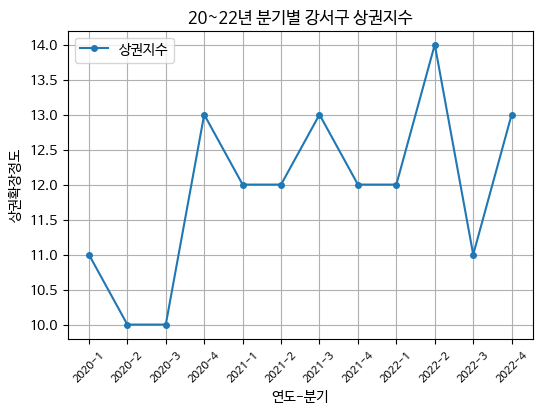

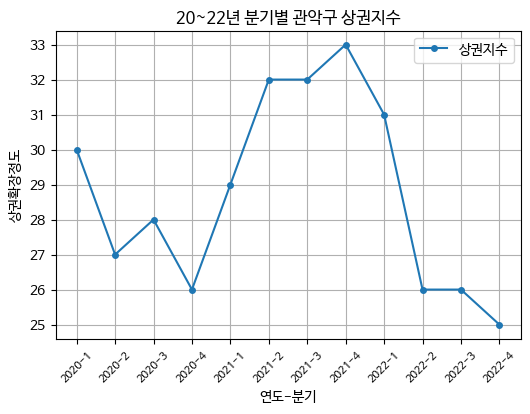

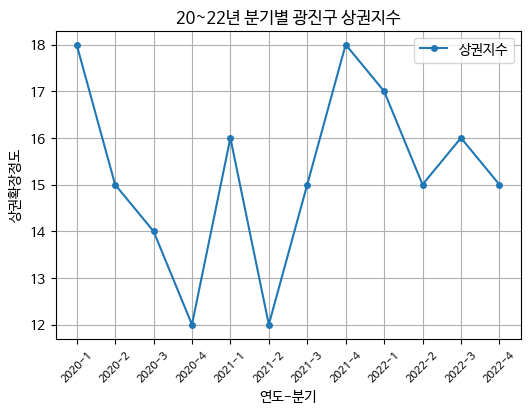

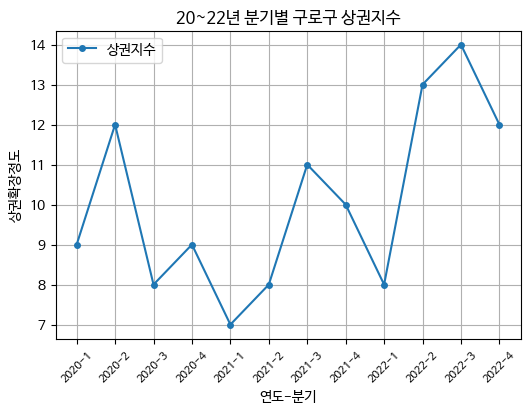

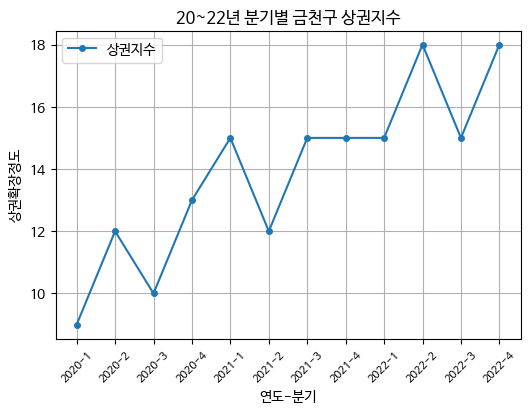

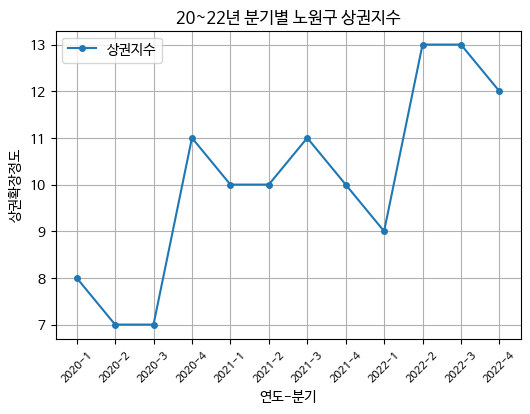

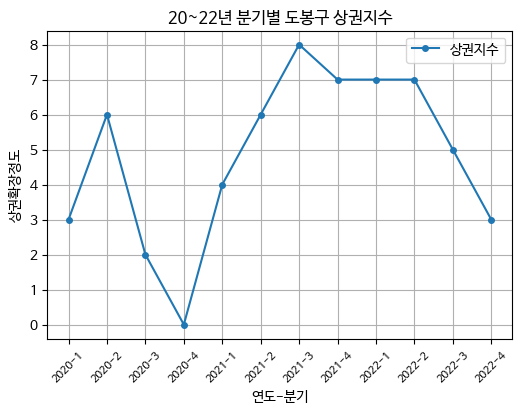

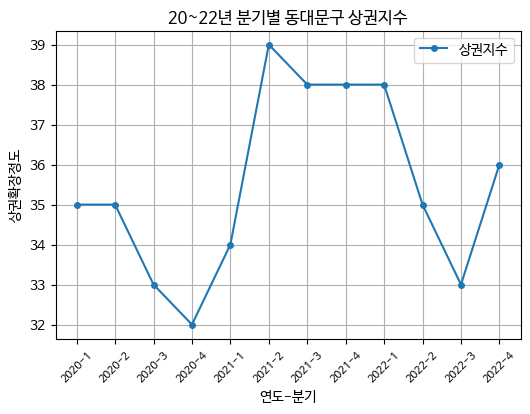

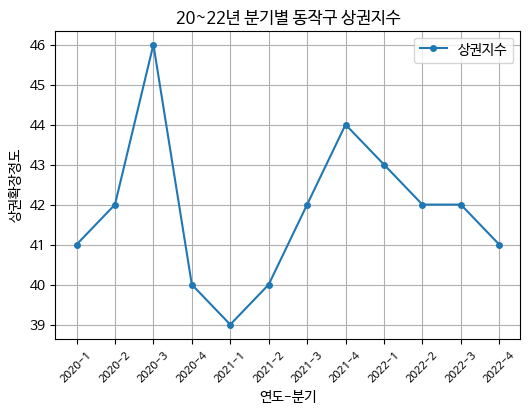

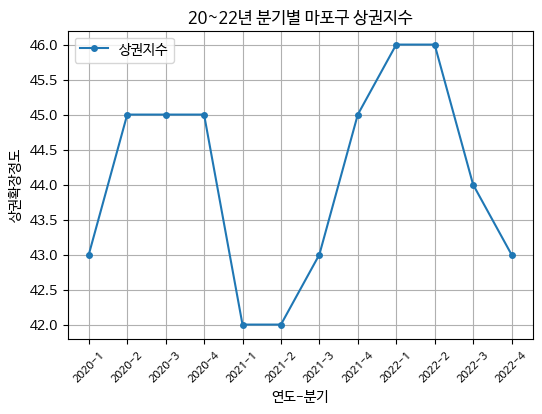

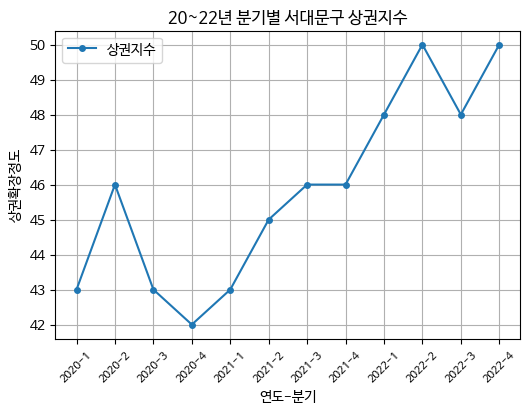

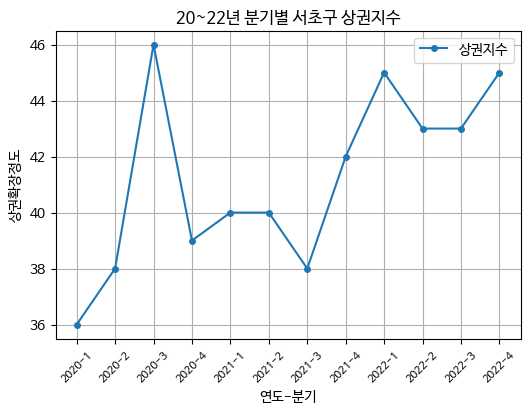

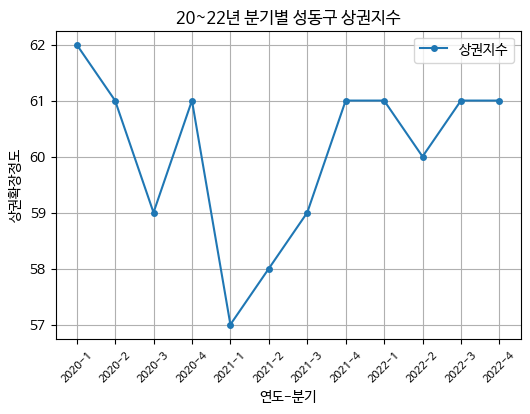

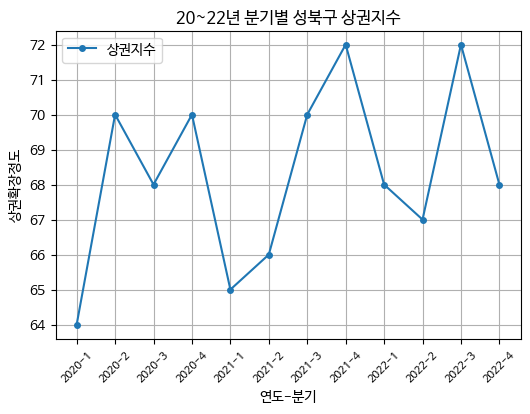

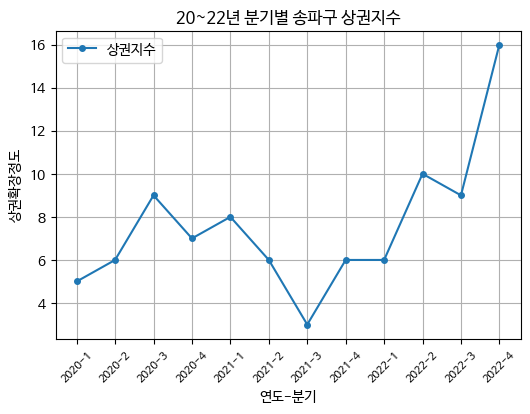

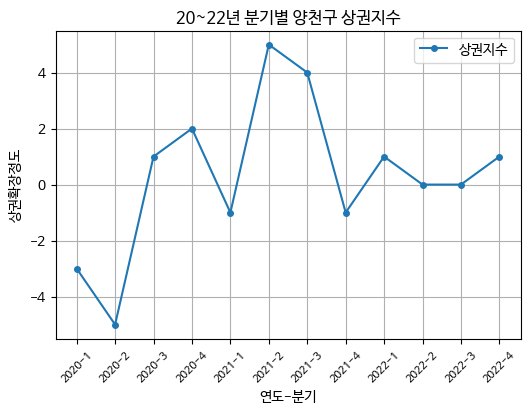

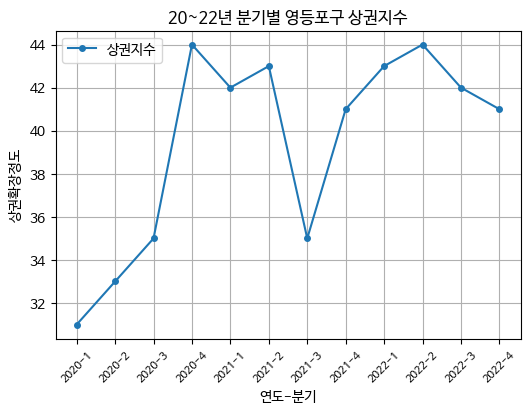

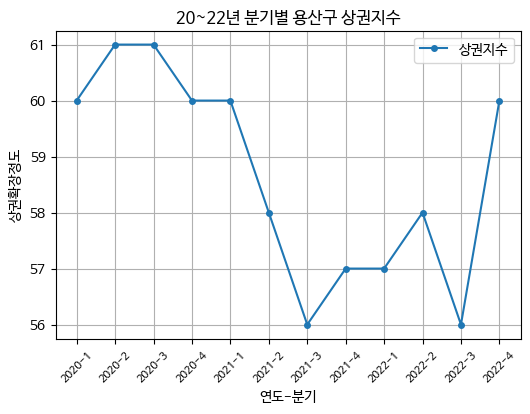

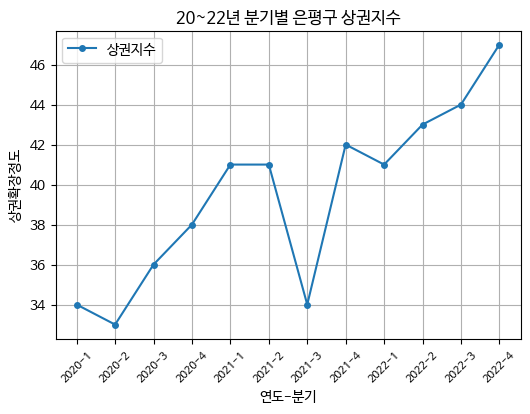

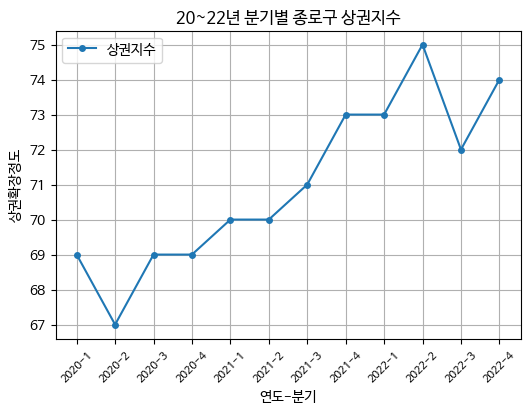

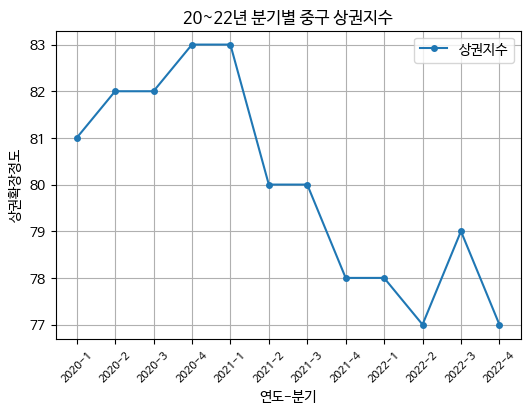

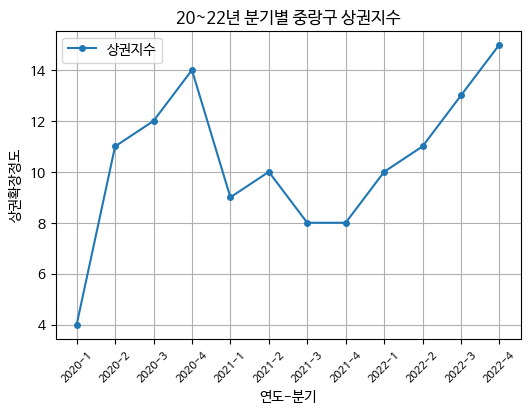

In [ ]:
# 그래프 그려보기

regions = df_gu['자치구'].unique()

for region in regions:
    df_region = df_gu[df_gu['자치구'] == region]

    plt.figure(figsize=(6, 4))
    plt.xticks(size=8, rotation=45)

    plt.plot(df_region['연도-분기'], df_region['상권확장점수'], marker='o', markersize=4, label='상권지수')

    plt.rcParams['axes.unicode_minus'] = False      # y축에 마이너스(-) 표시

    plt.xlabel('연도-분기')
    plt.ylabel('상권확장정도')

    plt.title(f'20~22년 분기별 {region} 상권지수')
    plt.grid(True)

    plt.legend()
    plt.show()


# 해당 분기에 상권지수가 -면 상권이 축소되는 경향을, 0이었으면 확장도 축소도 아닌 경향을, +면 확장되는 경향을 보였음을 의미함.

In [ ]:
# 생각해볼 점
# 내 임의대로 상권변화지수에 점수를 매기는 것이 데이터가 보여주는 결과를 왜곡하게 되는 것은 아닌가? 점수를 매길 때에 더 고려해야 할 것은 없는지? 제대로 보여주고 있는지?
# 개업률과 폐업률 간의 관계 혹은 상권 변화지수 이 두 데이터 중 어떤 것을 활용하는게 더 설득력 있는 결과를 내놓을 것인가?



#### 이 와중 생각난 아이디어 ####
# 데이터에 상권 변화지수가 있었듯, 우리 나름의 상권지수를 만들어볼 수 있지 않을까??

df

,index,연도,분기,상권구분코드,상권구분명,상권코드,상권명,자치구,행정동,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,상권확장점수
0,0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,HH,정체,146,65,123,56,1
1,2,2022,4,U,관광특구,1001494,종로?청계 관광특구,종로구,종로1.2.3.4가동,HH,정체,165,75,123,56,1
2,3,2022,4,U,관광특구,1001493,동대문패션타운 관광특구,중구,광희동,HH,정체,151,65,123,56,1
3,4,2022,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,중구,소공동,HH,정체,170,66,123,56,1
4,5,2022,4,U,관광특구,1001491,이태원 관광특구,용산구,이태원1동,HH,정체,129,61,123,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12866,20011,2020,1,A,골목상권,2110005,세검정,종로구,부암동,HH,정체,114,58,110,54,1
12867,20012,2020,1,A,골목상권,2110004,대신고등학교,종로구,무악동,HH,정체,151,76,110,54,1
12868,20013,2020,1,A,골목상권,2110003,세검정초등학교,종로구,부암동,LH,상권확장,107,58,110,54,2
12869,20014,2020,1,A,골목상권,2110002,독립문역 1번,종로구,무악동,HH,정체,137,60,110,54,1


## 2 : 동 별로 분석

In [ ]:
# 동 별로도 분석해보자
# 동별로 보기 위해 우선 전체 df를 구 별로 나누었음

df_gangnam = df[df.자치구=='강남구'].reset_index(drop=True)
df_songpa = df[df.자치구=='송파구'].reset_index(drop=True)
df_yeong = df[df.자치구=='영등포구'].reset_index(drop=True)
df_mapo = df[df.자치구=='마포구'].reset_index(drop=True)
df_gangseo = df[df.자치구=='강서구'].reset_index(drop=True)
df_seocho = df[df.자치구=='서초구'].reset_index(drop=True)
df_gwanak = df[df.자치구=='관악구'].reset_index(drop=True)
df_gangdong = df[df.자치구=='강동구'].reset_index(drop=True)
df_eunpyeong = df[df.자치구=='은평구'].reset_index(drop=True)
df_seongbuk = df[df.자치구=='성북구'].reset_index(drop=True)
df_jung = df[df.자치구=='중구'].reset_index(drop=True)
df_dong = df[df.자치구=='동대문구'].reset_index(drop=True)
df_gwangjin = df[df.자치구=='광진구'].reset_index(drop=True)
df_junglang = df[df.자치구=='중랑구'].reset_index(drop=True)
df_guro = df[df.자치구=='구로구'].reset_index(drop=True)
df_yangcheon = df[df.자치구=='양천구'].reset_index(drop=True)
df_jongno = df[df.자치구=='종로구'].reset_index(drop=True)
df_dongjak = df[df.자치구=='동작구'].reset_index(drop=True)
df_gangbuk = df[df.자치구=='강북구'].reset_index(drop=True)
df_yongsan = df[df.자치구=='용산구'].reset_index(drop=True)
df_seodaemun = df[df.자치구=='서대문구'].reset_index(drop=True)
df_seongdong = df[df.자치구=='성동구'].reset_index(drop=True)
df_nowon = df[df.자치구=='노원구'].reset_index(drop=True)
df_geumcheon = df[df.자치구=='금천구'].reset_index(drop=True)
df_dobong = df[df.자치구=='도봉구'].reset_index(drop=True)

In [ ]:
# 잘 나눠졌는지 확인
print(df_guro.자치구.unique())
print(df_dobong.자치구.unique())
print(df_gwangjin.자치구.unique())
df_gangnam

['구로구']
['도봉구']
['광진구']


,index,연도,분기,상권구분코드,상권구분명,상권코드,상권명,자치구,행정동,상권변화지표,상권변화지표명,운영영업개월평균,폐업영업개월평균,서울운영영업개월평균,서울폐업영업개월평균,상권확장점수
0,0,2022,4,U,관광특구,1001496,강남 마이스 관광특구,강남구,삼성1동,HH,정체,146,65,123,56,1
1,23,2022,4,R,전통시장,2130309,은마종합상점가,강남구,대치2동,HH,정체,220,71,123,56,1
2,24,2022,4,R,전통시장,2130308,청담삼익시장,강남구,청담동,HH,정체,127,71,123,56,1
3,25,2022,4,R,전통시장,2130307,도곡시장,강남구,역삼2동,HH,정체,143,57,123,56,1
4,28,2022,4,R,전통시장,2130304,신사상가,강남구,압구정동,HH,정체,181,80,123,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,19052,2020,1,A,골목상권,2110964,싸리고개근린공원,강남구,도곡1동,HH,정체,121,56,110,54,1
496,19053,2020,1,A,골목상권,2110963,역삼월드메르디앙아파트,강남구,역삼1동,HL,상권축소,128,51,110,54,-1
497,19057,2020,1,A,골목상권,2110959,신구중학교,강남구,압구정동,HH,정체,115,59,110,54,1
498,19060,2020,1,A,골목상권,2110956,언주역 8번,강남구,역삼1동,LH,상권확장,99,55,110,54,2


In [ ]:
## 강남구 df 정리

df_gangnam = df_gangnam.groupby(['연도', '분기', '행정동'])['상권확장점수'].sum().reset_index()

col = ['연도', '분기']
df_gangnam['연도-분기'] = df_gangnam[col].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
df_gangnam.drop(['연도', '분기'], axis=1, inplace=True)
df_gangnam = df_gangnam[['연도-분기', '행정동', '상권확장점수']]

print(df_gangnam.상권확장점수.sum())
df_gangnam

298


,연도-분기,행정동,상권확장점수
0,2020-1,개포1동,1
1,2020-1,개포2동,1
2,2020-1,개포4동,-4
3,2020-1,논현1동,2
4,2020-1,논현2동,0
...,...,...,...
214,2022-4,압구정동,2
215,2022-4,역삼1동,1
216,2022-4,역삼2동,2
217,2022-4,일원1동,-1


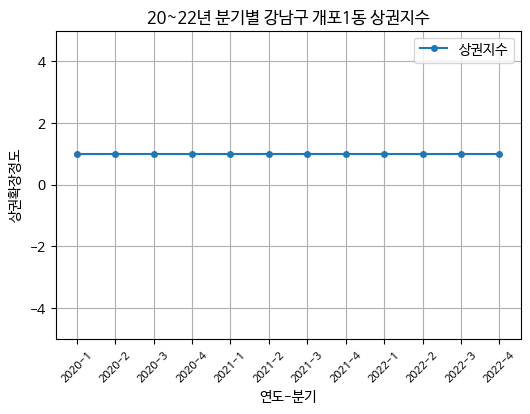

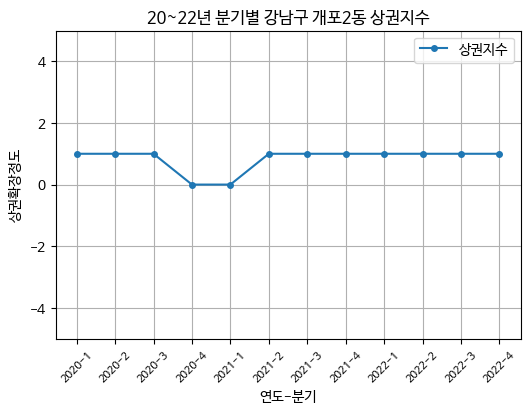

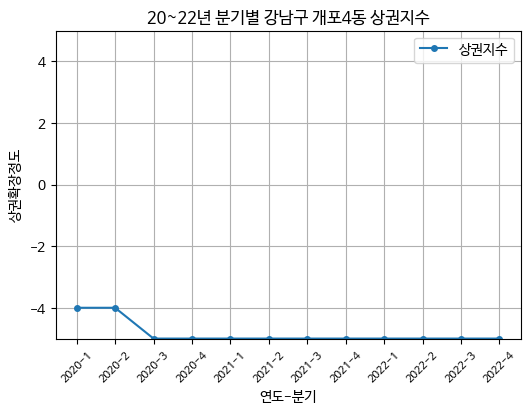

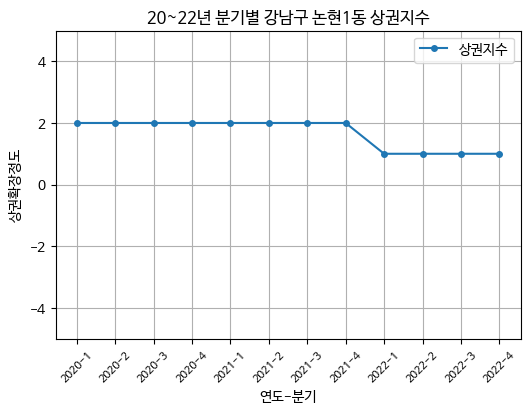

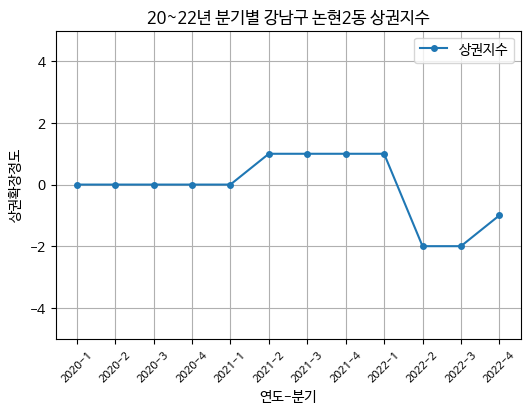

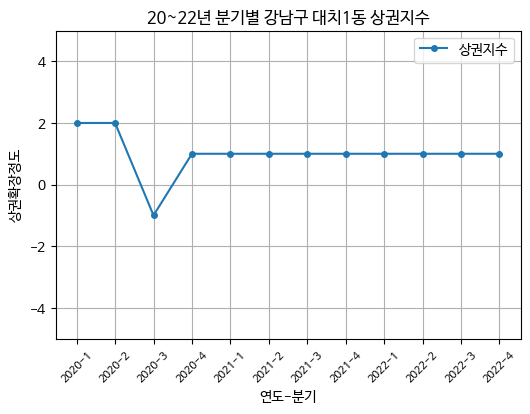

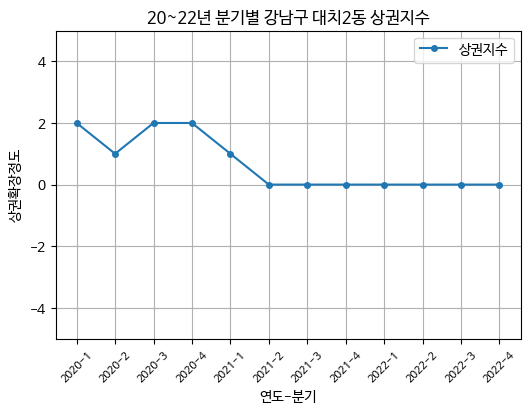

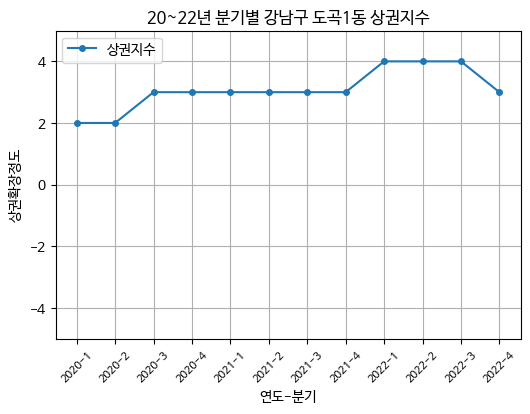

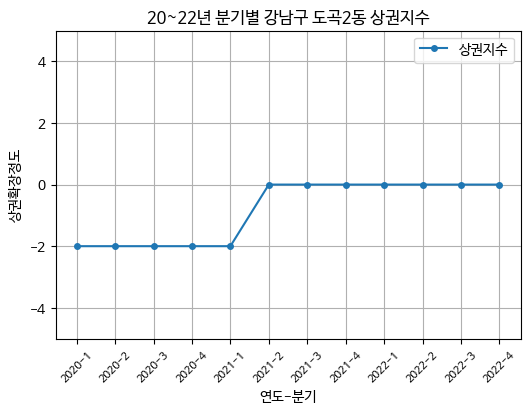

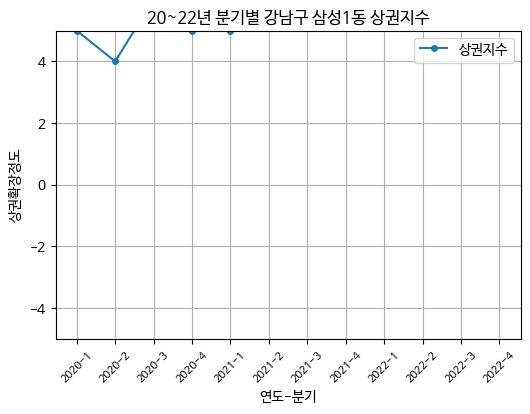

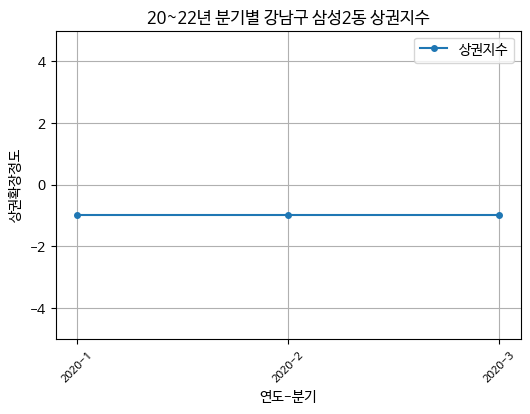

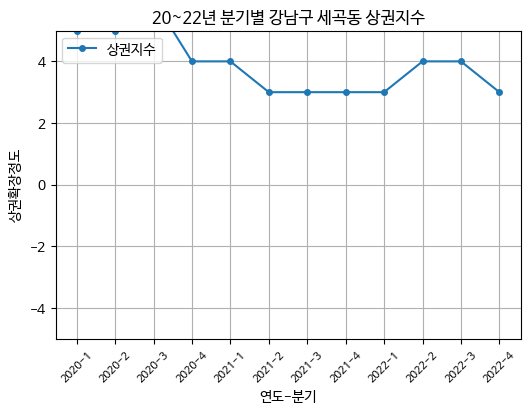

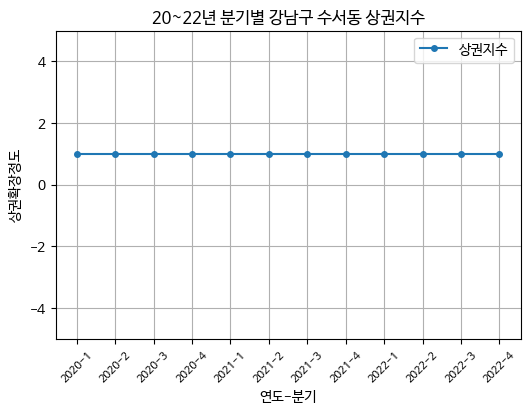

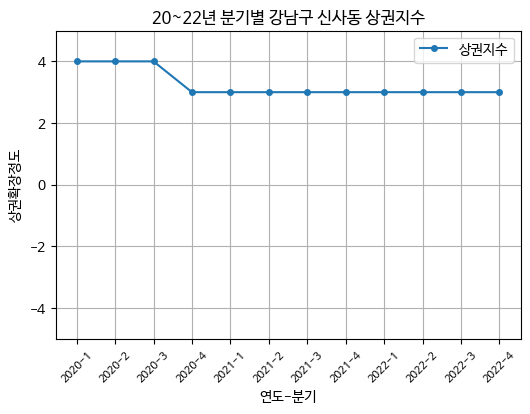

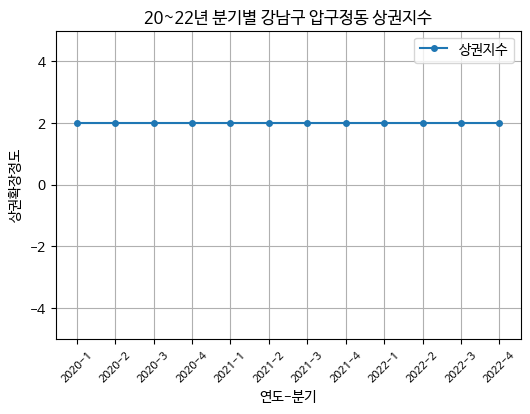

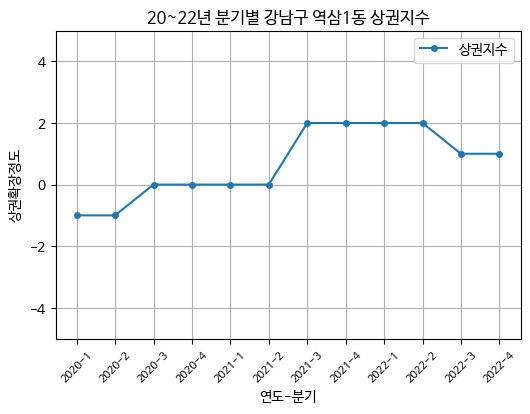

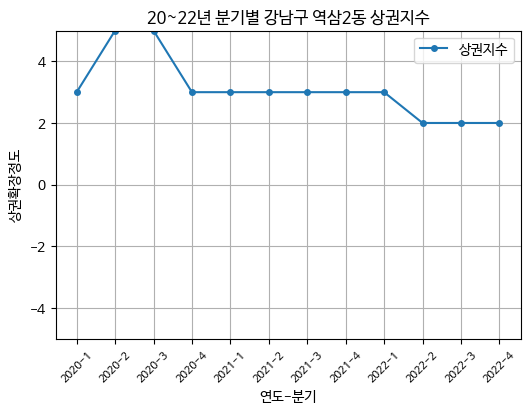

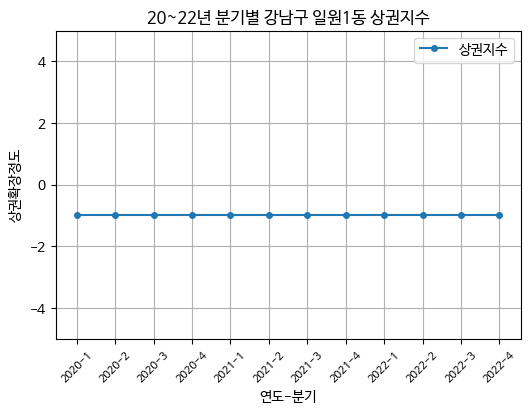

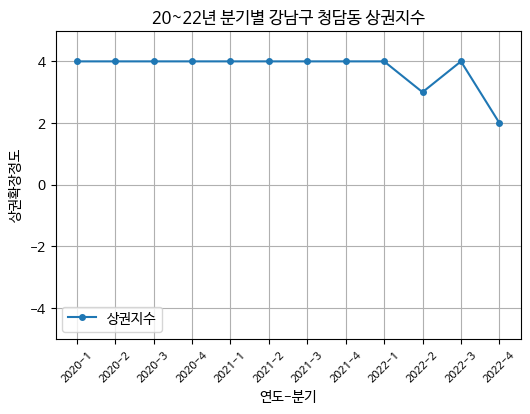

In [ ]:
# 그래프 그려보기

regions = df_gangnam['행정동'].unique()

for region in regions:
    df_region = df_gangnam[df_gangnam['행정동'] == region]

    plt.figure(figsize=(6, 4))
    plt.xticks(size=8, rotation=45)

    plt.plot(df_region['연도-분기'], df_region['상권확장점수'], marker='o', markersize=4, label='상권지수')

    plt.rcParams['axes.unicode_minus'] = False      # y축에 마이너스(-) 표시

    plt.ylim([-5,5])

    plt.xlabel('연도-분기')
    plt.ylabel('상권확장정도')

    plt.title(f'20~22년 분기별 강남구 {region} 상권지수')
    plt.grid(True)

    plt.legend()
    plt.show()


# 해당 분기에 상권지수가 -면 상권이 축소되는 경향을, 0이었으면 확장도 축소도 아닌 경향을, +면 확장되는 경향을 보였음을 의미함.